In [6]:
import math

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sb
import math

Hugo Allan García Monterrosa

Número de Matrícula 520462250


# Problema 1
## A. Polinomio con mejor ajuste.
Para encontrar el polinomio con mejor ajuste vamos a proceder a hacer 50 modelos
polinomiales y usaremos como medida de ajuste el Residual Squared Sum (RSS) dado por

$$ RSS = \sum_{i=1} (y_i - f(x_i))^2$$

El RSS es una buena medida de ajuste, ya que mide que tanto se alejan los datos observados
de las predicciones realizadas por el modelo.

<AxesSubplot:>

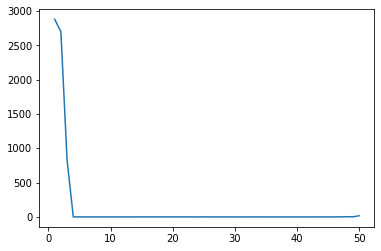

In [7]:
#Lectura del archivo CSV con los datos
datos_p1 = pd.read_csv("../data/problem1.csv")
max_pol_degree = 50
rss = []
X_train, y_train, X_test, y_test = datos_p1["X_training"],\
                   datos_p1["Y_training"],\
                    datos_p1["X_test"],\
                    datos_p1["Y_test"]

X_test.dropna(inplace=True)
y_test.dropna(inplace=True)

for i in range(1,max_pol_degree+1):
    poly = PolynomialFeatures(i, include_bias=True)
    poly_features = poly.fit_transform(np.array(X_train).reshape(-1, 1))
    poly_features_test = poly.fit_transform(np.array(X_test).reshape(-1, 1))
    polyreg = LinearRegression()
    polyreg.fit(poly_features,y_train)
    rss.append( np.sum(np.square( y_train - polyreg.predict( poly_features ) )))

#Haciendo gráfica de los resultados de RSS
sb.lineplot(x = range(1, max_pol_degree+1), y = rss)

In [8]:
#Imprimiendo el grado del polinomio con mejor ajuste
print("El polinomio con el mejor ajuste es el de grado {}".format(np.argmin(rss) + 1))


El polinomio con el mejor ajuste es el de grado 38


## B. Criterio AIC.
Calcularemos el AIC corregido utilizando las fórmulas
 $$ AIC = 2k -2\log(L) $$
 $$ AICc = AIC + \frac{2k(k+1)}{n-k-1} $$
 donde $k$ es el número de variables independientes en el modelo y $L$ es la medida de verosimulitud
 utilizada en el modelo, en este caso el MSS. Con esto calculamos los AIC y los graficamos, como
 sigue:

In [9]:
AIC = []
n = len(X_train)
for i in range(1, max_pol_degree +1):
    AIC.append( 2*(i+1) - 2*np.log10(rss[i-1] / n ) + (2*(i+1)*(i+2)) / ( n - i -2) )

<AxesSubplot:>

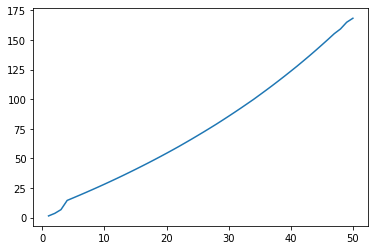

In [10]:
sb.lineplot(x = range(1, max_pol_degree+1), y = AIC)

De la gráfica podemos observar que, siguiendo el criterio de minimización de AIC, deberíamos elegir el polinomio
lineal.


## C. Validación Cruzada
Ahora haremos validación cruzada con los datos de test para el polinomio de grado 1.

In [11]:
    poly = PolynomialFeatures(i, include_bias=True)
    poly_features = poly.fit_transform(np.array(X_train).reshape(-1, 1))
    poly_features_test = poly.fit_transform(np.array(X_test).reshape(-1, 1))
    polyreg = LinearRegression()
    polyreg.fit(poly_features,y_train)
    mse = mean_squared_error(y_test, polyreg.predict(poly_features_test))
    print("El score para el modelo lineal es %.2f"%mse)

El score para el modelo lineal es 118563046717493837513638281216.00


Vemos que el score para el modelo lineal es bastante inadecuado. Misma situación muestra la siguiente
gráfica.

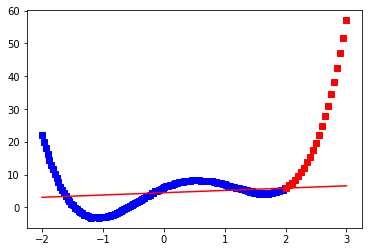

In [12]:
poly = PolynomialFeatures(1, include_bias=True)
poly_features = poly.fit_transform(np.array(X_train).reshape(-1, 1))
poly_features_test = poly.fit_transform(np.array(X_test).reshape(-1, 1))
polyreg = LinearRegression()
polyreg.fit(poly_features,y_train)
plt.plot(X_train, y_train, 'bs', label = "Datos de entrenamiento")
plt.plot(X_test, y_test, 'rs', label = "Datos de testing")
plt.plot(X_train, polyreg.predict(poly_features), 'r', label = 'Valores predecidos')
plt.plot(X_test, polyreg.predict(poly_features_test), 'r', label = 'Valores predecidos')

Para encontrar un mejor modelo, que haga mejores predicciones hacemos validación cruzada (solo con
los datos de test). En este caso el mejor modelo será el que tenga el score más bajo.

In [13]:
valores = []
for i in range(1,max_pol_degree+1):
    poly = PolynomialFeatures(i, include_bias=True)
    poly_features = poly.fit_transform(np.array(X_train).reshape(-1, 1))
    poly_features_test = poly.fit_transform(np.array(X_test).reshape(-1, 1))
    polyreg = LinearRegression()
    polyreg.fit(poly_features,y_train)
    mse = mean_squared_error(y_test, polyreg.predict(poly_features_test))
    valores.append(mse)
print("El polinomio con menor score en la validación cruzada fue el de grado {}".format(np.argmin(valores) +1))

El polinomio con menor score en la validación cruzada fue el de grado 6


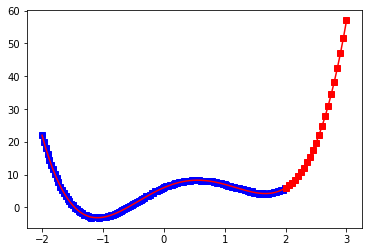

In [14]:
poly = PolynomialFeatures(6, include_bias=True)
poly_features = poly.fit_transform(np.array(X_train).reshape(-1, 1))
poly_features_test = poly.fit_transform(np.array(X_test).reshape(-1, 1))
polyreg = LinearRegression()
polyreg.fit(poly_features,y_train)
plt.plot(X_train, y_train, 'bs', label = "Datos de entrenamiento")
plt.plot(X_test, y_test, 'rs', label = "Datos de testing")
plt.plot(X_train, polyreg.predict(poly_features), 'r', label = 'Valores predecidos')
plt.plot(X_test, polyreg.predict(poly_features_test), 'r', label = 'Valores predecidos')

En realidad, si hacemos validación cruzada desde la construcción del modelo, con 5 folds, obtenemos que el mejor modelo
sería el de grado 4. Como se ve en las siguientes gráficas, en la primera vemos los scores para cada grado y en la segunda
como se ajusta el polinomio a los valores de testing.

Text(0.5, 1.0, 'MSE VS Grado')

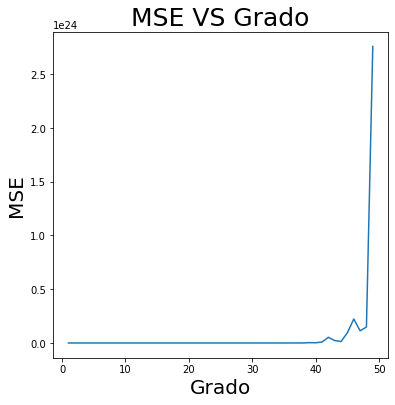

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
training_error=[]
cross_validation_error=[]
for d in range(1,max_pol_degree):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(np.array(X_train).reshape(-1,1))
    x_poly_test=PolynomialFeatures(degree=d).fit_transform(np.array(X_test).reshape(-1,1))
    lr=LinearRegression(fit_intercept=False)
    model = lr.fit(x_poly_train,y_train)
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    cve=cross_validate(lr,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,max_pol_degree),cross_validation_error)
ax.set_xlabel('Grado',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.set_title('MSE VS Grado',fontsize=25)

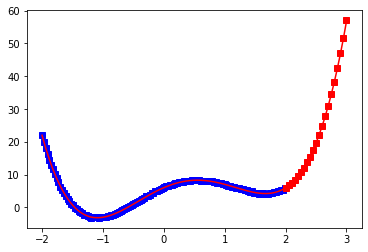

In [16]:
poly = PolynomialFeatures(4, include_bias=True)
poly_features = poly.fit_transform(np.array(X_train).reshape(-1, 1))
poly_features_test = poly.fit_transform(np.array(X_test).reshape(-1, 1))
polyreg = LinearRegression()
polyreg.fit(poly_features,y_train)
plt.plot(X_train, y_train, 'bs', label = "Datos de entrenamiento")
plt.plot(X_test, y_test, 'rs', label = "Datos de testing")
plt.plot(X_train, polyreg.predict(poly_features), 'r', label = 'Valores predecidos')
plt.plot(X_test, polyreg.predict(poly_features_test), 'r', label = 'Valores predecidos')

# Problema 2
Para este problema tenemos un conjunto de datos de apenas 8 observaciones. De esta cuenta, las deducciones que se puedan
realizar serán bastante pobres. Lo primero que haremos será leer el conjunto de datos y hacer unas gráficas de exploración
para ver si alguno de los features clasifica los datos de infectos con VIH.

In [17]:
datos_p2 = pd.read_csv('../data/problem2.csv')

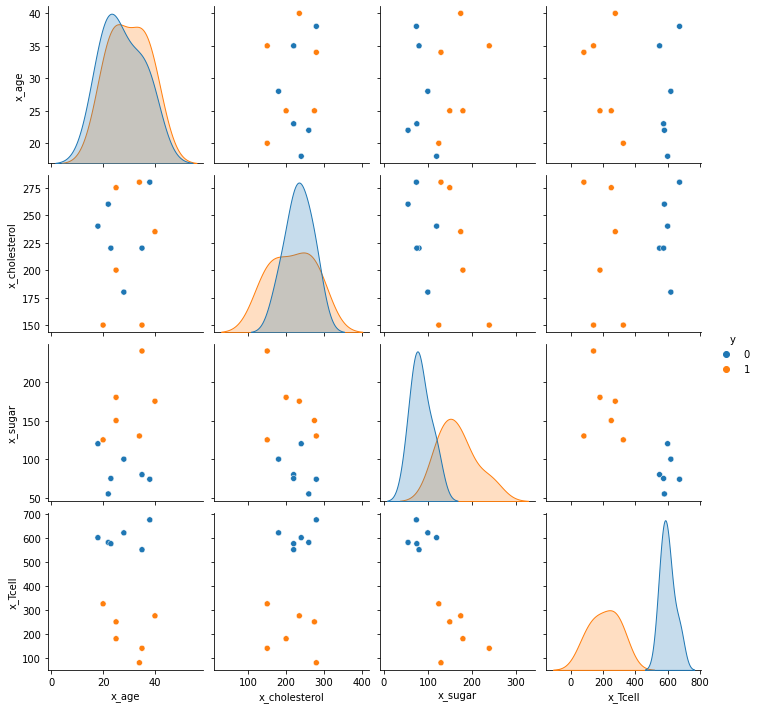

In [18]:
#Gráfica
sb.pairplot(datos_p2, hue='y', markers = 'o')
plt.show()

La gráfica muestra claramente que una buena característica para la clasificación es el nivel de célular T en la sange. La variable de nivel de azúcar en sangre también parecen ayudar a separar los datos.

Ahora procedemos a hacer una regresión logística para clasificar estos datos. Antes de hacer la regresión logística escalaremos los datos (con StandarScaler), para que cuando obtengamos los coeficientes de la regresión podamos inferir con claridad que feature clasifica mejor a los infectados.

In [19]:
target = datos_p2["y"]
features = datos_p2.drop(["y"], inplace=False, axis=1)
X_train_p2, X_test_p2, y_train_p2, y_test_p2 = train_test_split(features, target, test_size=0.2, random_state=5)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_p2)
X_test_std = sc.transform(X_test_p2)
lr = LogisticRegression()
lr.fit(X_train_std, y_train_p2)
print(np.exp(lr.coef_))

[[1.08409765 0.92822256 2.13461801 0.28755695]]


De los resultados vemos que un incremento de una unidad en el nivel de células T implica un aumento de más del 300% de no estar infectado con VIH, mientras que un incremento de una unidad del nivel de azúcar en sangre incrementa en 113% la probabilidad de padecer de VIH.

De los resultados vistos respondemos las preguntas:
1. ¿Qué variable se usaría como marcador para predecir la enfermedad? El nivel de células T.
2. ¿Cuál sería el criterio para predecir la enfermedad? Valores por abajo de 500 en células T son casos de pacientes infectados y por arriba de ese valor son casos de pacientes no infectados. (Esto basado en la gráfica)

# Problema 3
Para el problema 3 se trabajará con el paper **2020_Richens_Causal inference and counterfactual prediction in machine learning for actionable healthcare.**
## Ensayo
El paper habla sobre modelos de aprendizaje de máquina que permitan guiar la toma de decisiones
en la práctica médica. Los modelos de aprendizaje de máquina han mostrado ser efectivos en la práctica para predecir algunos
fenómenos naturales sin importar si son de tipo caja negra o modelos que son interpretables.

En la práctica de la medicina se necesita contar con modelos que sean accionables, en el sentido, que permitan
tomar las mejores decisiones para un paciente basada en evidencia, como un símil de los ensayos de control
aleatorizados (en inglés RCT), que permiten conocer claramente la causa y efecto de los tratamientos
en los pacientes.

El principal problema que presentan los modelos de aprendizaje es que toman datos que provienen de bases de datos
públicas que generalmente tienen sesgo de muestreo o de discriminación de pacientes (por falta de recursos para acceder
a la red médica) o hay variables que están altamente correlacionadas y presentan colinealidad.
El artículo da una serie de ejemplos como el hecho que las manos amarillas están relacionadas con
el cancer de pulmón, principalmente porque los fumadores tienden a manchar sus manos por el uso de la nicotina, pero
el atender el color de las manos de ninguna manera reducirá el riesgo de contraer el cáncer.

Otro ejemplo interesante es el estudio que concluye que los pacientes hospitalizados por neumonía
y con historial conocido de asma tienen mejor oportunidad de recuperarse. Si este tipo de conclusiones
se utilizara, debido a una mala conducción en el modelo, podría llevar a los médicos a tener menor cuidado
con los asmáticos que desarrollan neumonía. La explicación más probable para esta conclusión (obtenida mediante un modelo
de red neuronal) es que cuando un asmático llega con neumonía a un hospital, inmediatamente es llevado a la unidad de
cuidados intensivos, llevando a una mejor atención y por ende a una recuperación.

Se han desarrollado algunos frameworks que permiten trabajar bases de datos y dar tratamiento a los sesgos inherentes
en las variables. Estos frameworks se han probado y contrastado con RCT llegando a las mismas conclusiones, mientras que los
modelos que no utilizan el framework lleva a conclusiones erróneas.

Otro aspecto importante que se busca en los modelos de aprendizaje es que puedan tener transportabilidad,
es decir, que los resultados obtenidos en una población sean trasladables a otra población independiente de
la primera. Esto es importante porque permite probar la causa-efecto en la nueva población y por ende
llevar la implementación del modelo para tomar decisiones basadas en evidencia.

Por lo visto en estes ejemplos, es importante hacer conciencia en la importancia de conocer los posibles
sesgos que pueden darse en un modelo y tratar de atenderlos cuando el mismo será un modelo accionable, principalmente
en el campo de la medicina que se basa en el principio <<lo primero es no perjudicar>>. Es importante que los modelos
de aprendizaje puedan tener la capacidad de inferir causa-efecto ya que muchas veces, por razones éticas,
es imposible llevar a cabo un RCT, por lo que este tipo de herramientas vendrían a ser de mucha utilidad para
tomar decisiones basadas en evidencia.


In [20]:
texto = """El paper habla sobre modelos de aprendizaje de máquina que permitan guiar la toma de decisiones
en la práctica médica. Los modelos de aprendizaje de máquina han mostrado ser efectivos en la práctica para predecir algunos
fenómenos naturales sin importar si son de tipo caja negra o modelos que son interpretables.

En la práctica de la medicina se necesita contar con modelos que sean accionables, en el sentido, que permitan
tomar las mejores decisiones para un paciente basada en evidencia, como un símil de los ensayos de control
aleatorizados (en inglés RCT), que permiten conocer claramente la causa y efecto de los tratamientos
en los pacientes.

El principal problema que presentan los modelos de aprendizaje es que toman datos que provienen de bases de datos
públicas que generalmente tienen sesgo de muestreo o de discriminación de pacientes (por falta de recursos para acceder
a la red médica) o hay variables que están altamente correlacionadas y presentan colinealidad.
El artículo da una serie de ejemplos como el hecho que las manos amarillas están relacionadas con
el cancer de pulmón, principalmente porque los fumadores tienden a manchar sus manos por el uso de la nicotina, pero
el atender el color de las manos de ninguna manera reducirá el riesgo de contraer el cáncer.

Otro ejemplo interesante es el estudio que concluye que los pacientes hospitalizados por neumonía
y con historial conocido de asma tienen mejor oportunidad de recuperarse. Si este tipo de conclusiones
se utilizara, debido a una mala conducción en el modelo, podría llevar a los médicos a tener menor cuidado
con los asmáticos que desarrollan neumonía. La explicación más probable para esta conclusión (obtenida mediante un modelo
de red neuronal) es que cuando un asmático llega con neumonía a un hospital, inmediatamente es llevado a la unidad de
cuidados intensivos, llevando a una mejor atención y por ende a una recuperación.

Se han desarrollado algunos frameworks que permiten trabajar bases de datos y dar tratamiento a los sesgos inherentes
en las variables. Estos frameworks se han probado y contrastado con RCT llegando a las mismas conclusiones, mientras que los
modelos que no utilizan el framework lleva a conclusiones erróneas.

Otro aspecto importante que se busca en los modelos de aprendizaje es que puedan tener transportabilidad,
es decir, que los resultados obtenidos en una población sean trasladables a otra población independiente de
la primera. Esto es importante porque permite probar la causa-efecto en la nueva población y por ende
llevar la implementación del modelo para tomar decisiones basadas en evidencia.

Por lo visto en estes ejemplos, es importante hacer conciencia en la importancia de conocer los posibles
sesgos que pueden darse en un modelo y tratar de atenderlos cuando el mismo será un modelo accionable, principalmente
en el campo de la medicina que se basa en el principio <<lo primero es no perjudicar>>. Es importante que los modelos
de aprendizaje puedan tener la capacidad de inferir causa-efecto ya que muchas veces, por razones éticas,
es imposible llevar a cabo un RCT, por lo que este tipo de herramientas vendrían a ser de mucha utilidad para
tomar decisiones basadas en evidencia. """
len(texto.split())

519